# Task 1: Data Preparation

## Import necessary libraries and load the dataset

In [4]:
# Assignment 3 
# Task 1: Data Preparation

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

data = pd.read_csv(url, names=column_names, sep=',\s', na_values=' ?', engine='python', skipinitialspace=True)

# Display the first few rows of the dataset
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Find out the dimensions of the dataset
data.shape

(32561, 15)

## Data processing

In [6]:
# Handling missing values
data = data.dropna()
'''
Many ML algorithms cannot handle missing values directly. If the dataset contains missing values can lead to errors or biased results.
So handling missing values is important in two ways:
    1. Ensures the completeness and integrity of the dataset.
    2. Prevents potential issues during model training and prediction.
'''

# Encoding categorical variables
categorical_features = ['workclass', 'education', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'native_country']
numerical_features = ['age', 'fnlwgt', 'education_num',
    'capital_gain', 'capital_loss', 'hours_per_week']
'''
ML models generally work with numerical data, and many algorithms require numerical input. 
Categorical variables (e.g., text labels) need to be transformed into a numerical format.
So encoding categorical variables can not only enable models to process and understand categorical information,
but also ensure compatibility with algorithms that expect numerical input.
'''

# Scaling numerical features by performing different transformations on different subsets of columns in dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])
'''
Many ML algorithms are sensitive to the scale of numerical features. Features with different scales might dominate the learning process, leading to biased or inefficient models.
So scaling numerical features can ensure that features contribute equally to the learning process, preventing certain features from dominating the learning process.  
'''

# Apply a transformation to the original dataset 'data' using the preprocessor object
data_transformed = preprocessor.fit_transform(data)

# Encoding target variable by transforming the 'income' column into a binary representation, 
# where 1 indicates an income greater than 50K and 0 indicates an income less than or equal to 50K.
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

## Spliting the dataset

In [7]:
# Splitting the dataset into 70% for training, 15% for validation, and 15% for testing sets
X_train, X_temp, y_train, y_temp = train_test_split(data_transformed, data['income'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
'''
Importance of data splitting
    1. Model Evaluation: 
        Without separate sets for validation and testing, the model might perform well on the data it was trained on but fail 
        to generalize to new, unseen data.
    2. Preventing Overfitting: 
        The validation set helps identify when a model is overfitting the training data, as performance on the validation set 
        can serve as a check on the model's ability to generalize.
    3. Hyperparameter Tuning: 
        The validation set is crucial for tuning hyperparameters to optimize model performance.
    4. Unbiased Performance Estimate: 
        The testing set provides an unbiased estimate of the model's performance on new, unseen data, giving insights into how 
        well the model is expected to perform in real-world scenarios.

Potential impact on model evaluation:
    1. Early Detection of Issues:
        The validation set allows early detection of issues like overfitting or underfitting, helping iterate and improve the 
        model before testing.
    2. Hyperparameter Tuning: 
        With a dedicated validation set, hyperparameters can be tuned to optimize the model's performance without introducing 
        bias from the testing set.
    3. Confidence in Deployment: 
        Knowing the model's performance on a separate testing set instills confidence in deploying the model to real-world scenarios.
'''

'# Scale numerical features for training, validation, and testing sets\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_val_scaled = scaler.transform(X_val)\nX_test_scaled = scaler.transform(X_test)'

## Visualizing the dataset

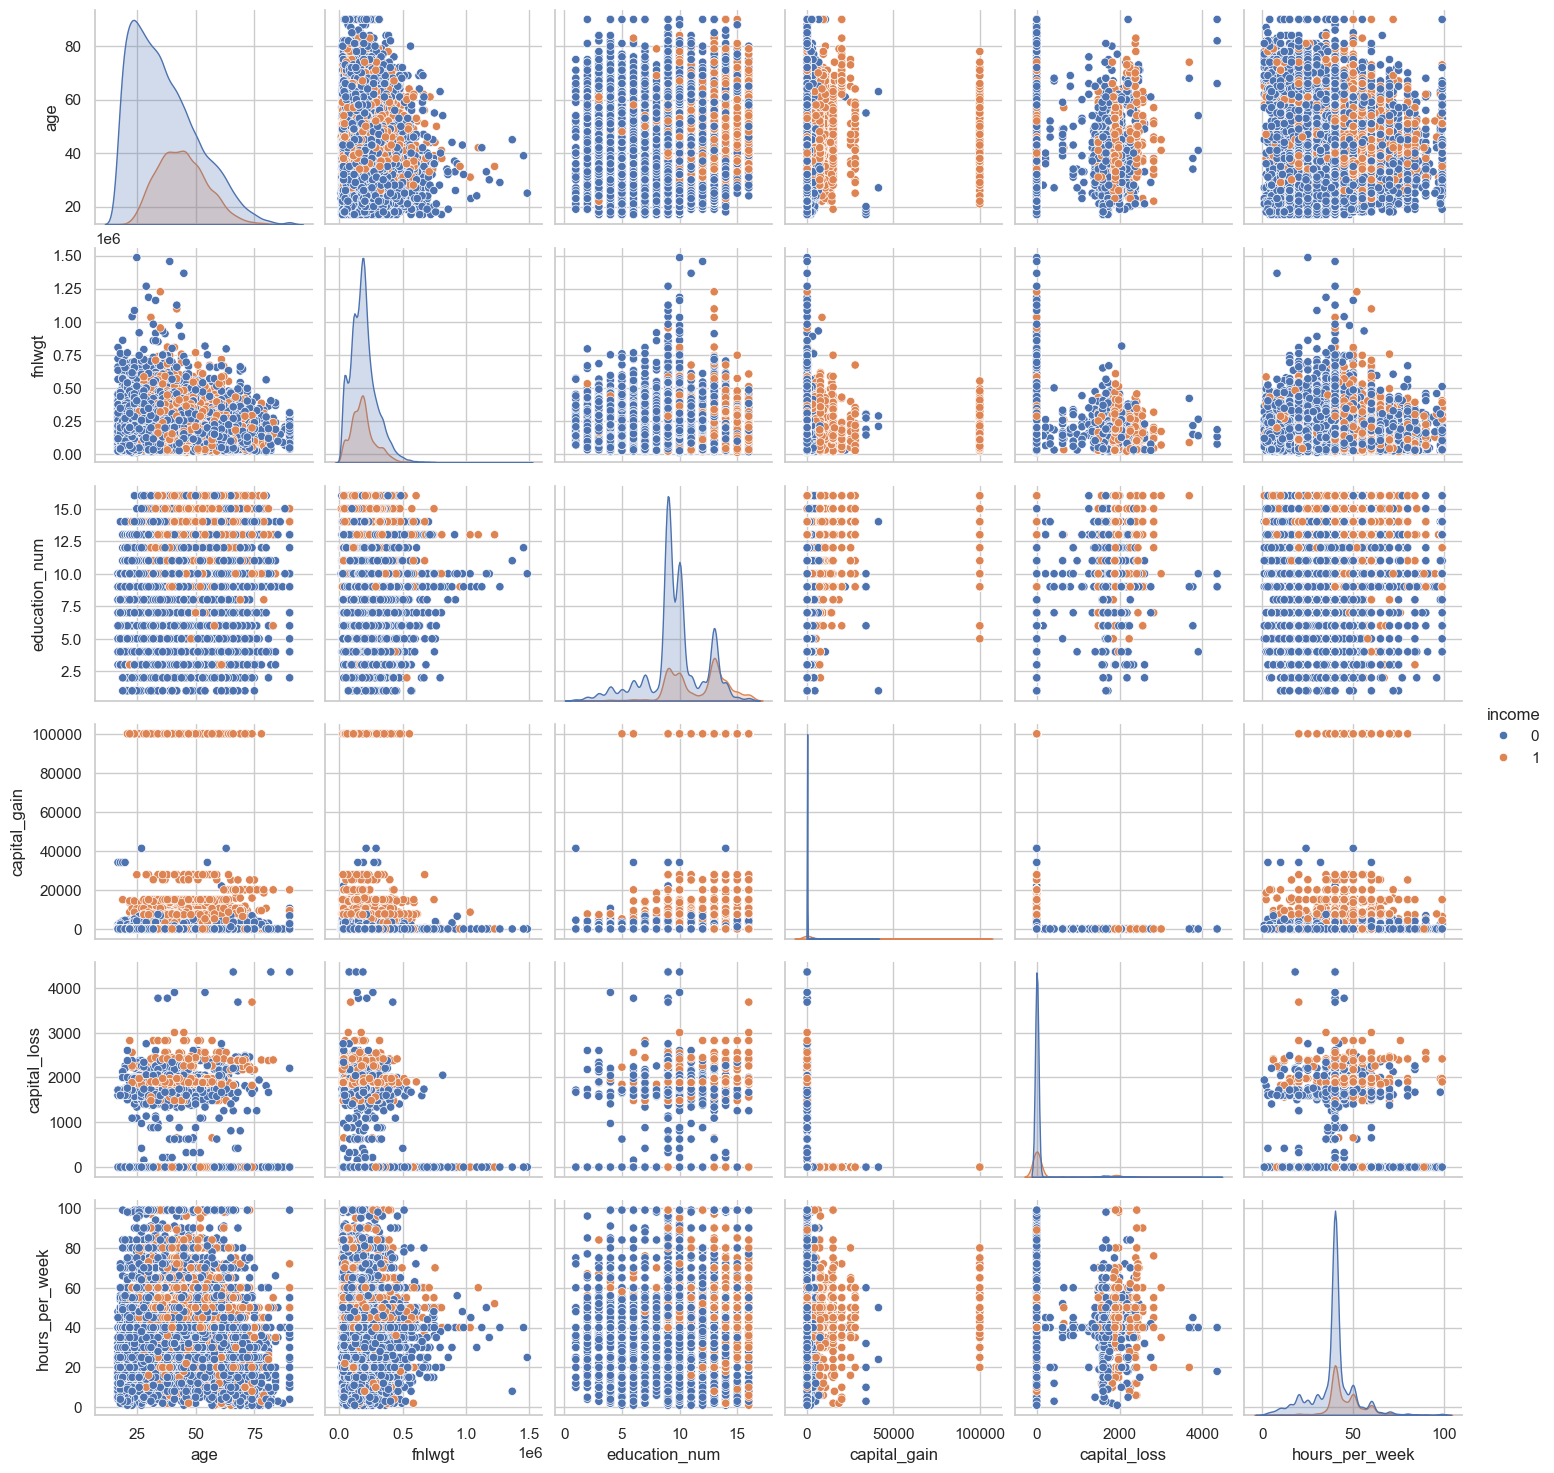

In [5]:
'''
Insights of data visualization:
    1. It can help understand the distribution of features.
    2. It can analyze the relationships between features.
    3. It can analyze the categorical features.
    4. It can show the variation of a variable over time.
    5. It can help identify outliers or anomalies in the data.
    6. It can aid in recognizing patterns, trends, or clusters in the data.
    7. It can identify imbalances in categorical data.
    8. It can help understand the importance of features.
'''

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualizing the dataset
sns.pairplot(data[numerical_features + ['income']], hue='income')
plt.show()

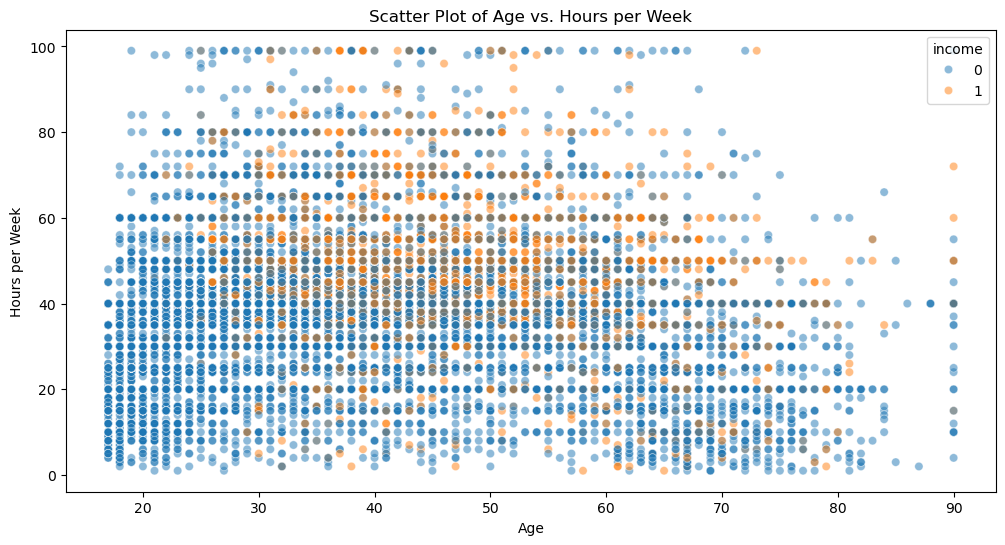

In [8]:
# Scatter plot of age vs. hours_per_week colored by income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hours_per_week', hue='income', data=data, alpha=0.5)
plt.title('Scatter Plot of Age vs. Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

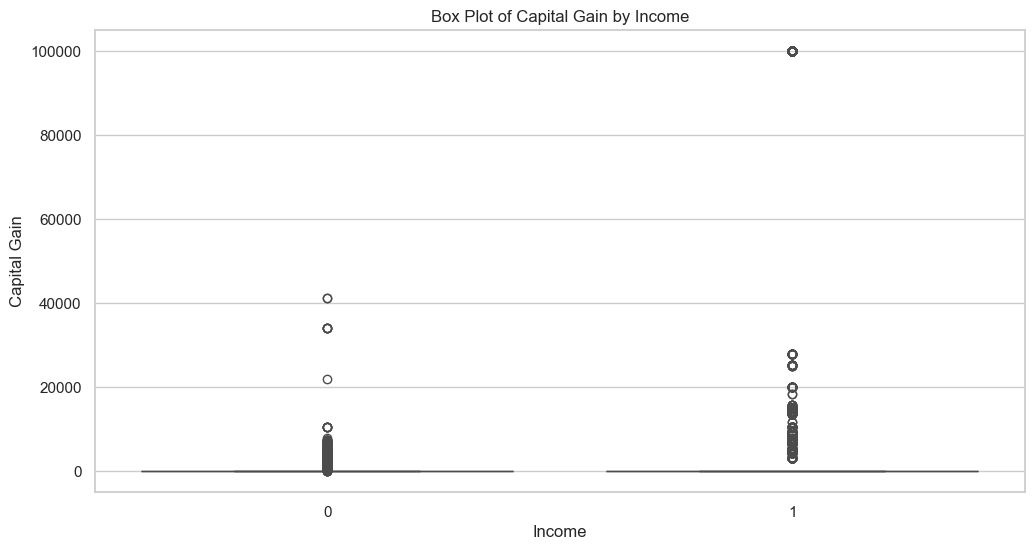

In [7]:
# Box plot for capital_gain by income
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='capital_gain', data=data)
plt.title('Box Plot of Capital Gain by Income')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.show()

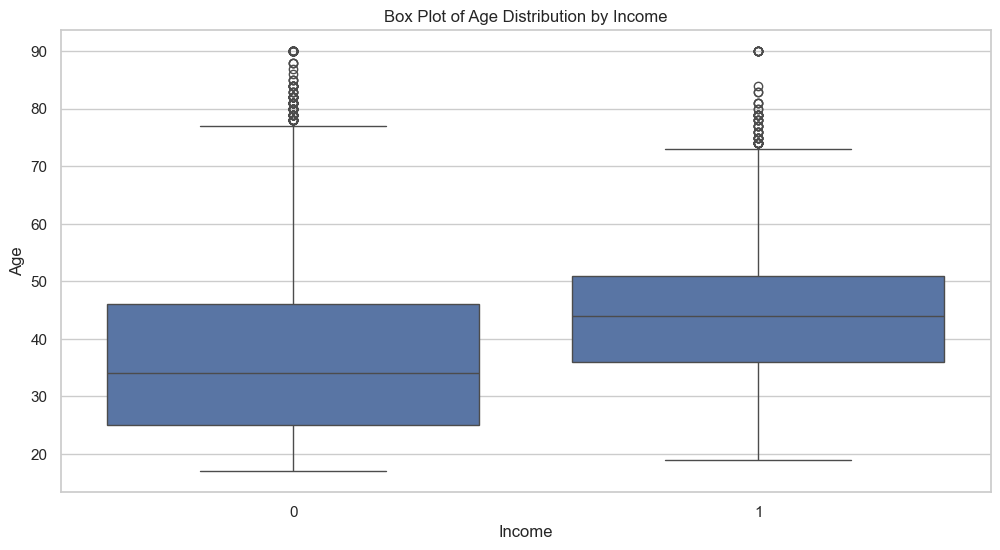

In [8]:
# Box plot for age distribution by income
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Box Plot of Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

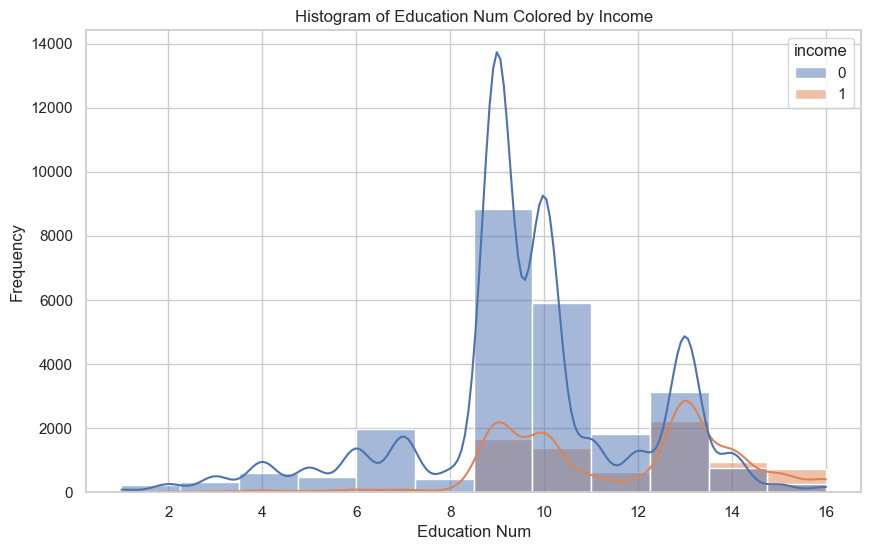

In [9]:
# Histogram of education_num colored by income
plt.figure(figsize=(10, 6))
sns.histplot(x='education_num', hue='income', data=data, bins=12, kde=True)
plt.title('Histogram of Education Num Colored by Income')
plt.xlabel('Education Num')
plt.ylabel('Frequency')
plt.show()

# Task 2: Machine Learning Model

## Import libraries and train the model

In [9]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Choosing Random Forest Classifier
# I chose the Random Forest Classifier because it tends to perform well on a lot of datasets and handles both numerical and categorical features well.
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate on validation data

In [12]:
# For evaluation, I used accuracy as a primary metric and the classification report for a more detailed view, including precision, recall, and F1-score.
# Evaluating the model on the validation data
y_val_pred = rf.predict(X_val)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy on Validation Data: {accuracy:.4f}\n')

print('Classification Report:')
print(classification_report(y_val, y_val_pred))

Accuracy on Validation Data: 0.8530

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3700
           1       0.73      0.63      0.68      1184

    accuracy                           0.85      4884
   macro avg       0.81      0.78      0.79      4884
weighted avg       0.85      0.85      0.85      4884



## Hyperparameter tuning

In [26]:
'''
Importance of hyperparameter tuning:
    1. Maximizing model performance optimization.
    2. Addressing overfitting or underfitting.
    3. Improving convergence and speed.
    4. Robusting to data variations.

Impact on model accuracy:
    1. It can lead to improved accuracy on the training set by optimizing the model's fit to the training data.
    2. It can enhance the model's accuracy on unseen data, ensuring it generalizes well to real-world scenarios.
    3. It can help identify and set some hyperparameters to values that maximize accuracy.
'''

# Setting up parameter grid
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Evaluate the model with the best hyperparameters on the validation data
best_rf_model = grid_search.best_estimator_
y_val_pred_tuned = best_rf_model.predict(X_val)

# Calculate accuracy and print classification report for tuned model
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
print(f'\nAccuracy on Validation Data (Tuned Model): {accuracy_tuned:.4f}\n')

print('Classification Report (Tuned Model):')
print(classification_report(y_val, y_val_pred_tuned))

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Accuracy on Validation Data (Tuned Model): 0.8600

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3700
           1       0.78      0.59      0.67      1184

    accuracy                           0.86      4884
   macro avg       0.83      0.77      0.79      4884
weighted avg       0.85      0.86      0.85      4884



## Interpret the model's results

In [25]:
# Feature Importance
feature_importances = best_rf_model.feature_importances_
print("Feature importances:\n", feature_importances)

'''
The accuracy on the validation data provides an indication of the model's performance. 
The classification report offers a detailed understanding of the model's strengths and weaknesses.

Limitations could include biases in the training data or features not adequately capturing the complexity of the problem.

Ways to address limitations:
    1. Tuning Hyperparameters: Adjust the max_depth, min_samples_split, and min_samples_leaf hyperparameters to control tree depth and leaf size.
    2. Controlling Tree Count: Limit the number of trees in the forest using the n_estimators hyperparameter.
    3. Feature Importance: Use feature importance measures provided by the Random Forest to understand the contribution of each feature.
    4. Visualizations: Explore tree visualizations, such as individual decision tree plots, to gain insights into the decision-making process.
    5. Feature Selection: Prioritize important features and consider reducing the number of less informative features.
    6. Data Cleaning: Preprocess data to handle outliers and remove noise.
'''

Feature importances:
 [9.19118474e-02 5.13965112e-02 9.74610722e-02 1.29237691e-01
 3.29182063e-02 5.83982340e-02 2.59599584e-03 5.71662590e-03
 4.11282632e-03 3.42673603e-06 7.27068881e-03 7.01408689e-03
 7.93459533e-03 3.30676266e-03 5.58142446e-05 1.49433374e-03
 2.41065379e-03 6.77216545e-04 1.63690052e-04 7.86007521e-04
 2.84690415e-03 1.23810328e-03 2.31565095e-03 2.61454129e-03
 1.70957840e-02 5.59315164e-03 8.35369420e-03 1.33076844e-02
 2.94405859e-05 8.44894305e-03 5.29808633e-03 9.01484395e-03
 5.10616408e-04 1.16728616e-01 9.66252750e-04 3.57179781e-02
 2.06444906e-03 1.90210313e-03 2.48966167e-03 4.39375434e-03
 8.98478087e-06 4.11573564e-03 2.58934641e-02 4.83902854e-03
 2.69052500e-03 3.66848615e-03 8.03305524e-03 8.42187478e-05
 1.82347525e-02 2.00305037e-03 5.27004347e-03 4.29657304e-03
 2.86908416e-03 5.45435396e-02 1.83581231e-02 2.00132271e-03
 1.35911730e-02 8.06649660e-03 1.35747233e-02 1.00472366e-03
 2.31147641e-03 3.77018238e-03 7.99403435e-04 5.34023004e-03
 1

"\nThe accuracy on the validation data provides an indication of the model's performance. \nThe classification report offer a detailed understanding of the model's strengths and weaknesses.\n\nLimitations could include biases in the training data or features not adequately capturing the complexity of the problem.\n"